In [105]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3)) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3)) # 22
model.add(Activation('relu'))
#model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(10, 1, 1)) # 11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3)) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3)) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1)) #7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3,3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1,1))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: Us

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_17 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_21 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
activation_22 (Activation)   (None, 24, 24, 10)        0         
__________

In [106]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
model.load_weights('/content/gdrive/My Drive/eva5/epochs:035-val_acc:0.993.hdf5')

In [0]:
validation_data = datagen.flow(testX, testy, batch_size=batch_size,shuffle=False)

In [0]:
Y_pred = model.predict_generator(validation_data, steps=np.ceil(testX.shape[0]/batch_size), verbose=0)
y_pred = np.argmax(Y_pred, axis=1) 
y_true = np.argmax(testy, axis=1) 

In [0]:
miss_class = []

i=0
for i in range(len(y_true)):
  if(y_true[i] != y_pred[i]):
    miss_class.append(i)
    if(len(miss_class) == 26):
      break
  

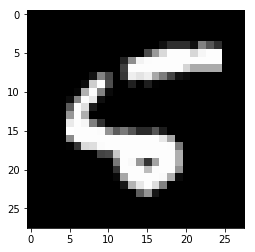

In [111]:
plt.imshow(testX[miss_class[0]].reshape(28,28),cmap="gray")

In [0]:
from google.colab import files

for j in range(25):
  img_name="missclassified_images " +str(miss_class[j]) +r'.png'
  #print(img_name)
  plt.imsave(img_name,testX[mis_class[j]].reshape(28,28))
  files.download(img_name)

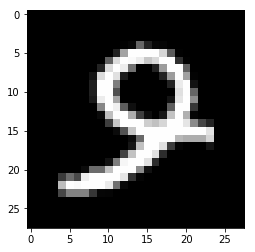

In [114]:
plt.imshow(testX[2129].reshape(28,28),cmap="gray")